# Data Wrangling: NYCFlights Data
January 29th

## About the Problem Set: 


This assignment involves extensive Data frame splitting 
and aggregation. You should look into the details of the methods 
groupby, transform, sum, count, mean etc 

In this problem set you will perform a basic exploratory analysis on
an example dataset, bringing to bear all of your new skills in data
manipulation and visualization. You will be required to submit well
commented python code, documenting all code used in this problem set,
along with a write up answering all questions below. Use figures as
appropriate to support your answers, and when required by the problem.

## Preliminaries 

In [1]:
#IPython is what you are using now to run the notebook
import IPython
print( "IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with arrays and matrices
import numpy as np
print( "Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print( "SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print( "Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib.pyplot as plt
#print( "Mapltolib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__)
%matplotlib inline
# necessary for in-line graphics

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print( "Scikit-Learn version: %6.6s (need at least 0.13.1)" %
       sklearn.__version__)
import os
# for certain system-related functions

IPython version:       7.2.0 (need at least 1.0)
Numpy version:        1.15.4 (need at least 1.7.1)
SciPy version:         1.1.0 (need at least 0.12.0)
Pandas version:       0.23.4 (need at least 0.11.0)
Scikit-Learn version: 0.20.1 (need at least 0.13.1)


In [190]:
## Let's read the data and print some summary information
## adjust the path for your file system!
## you can find the path like this:
path = os.getcwd()
print(path)
dataPath = path + "/data/flights.csv.bz2"
flights_df= pd.read_csv(dataPath)

/Users/akshaykhanna/Desktop/OneDrive/University of Washington/06 Winter Quarter 2019/IMT 574 Data Sceince 2 (MAchine Learning)/Problem Sets


In [3]:
## Extract some basic information about the data like number of rows,
## columns, column names, data types
print("Shape of the flights data set: ",flights_df.shape)
print("\n\nColumns in flights dataset:\n",flights_df.columns)
print("\n\nData type of all the columns:\n",flights_df.dtypes)

Shape of the flights data set:  (336776, 17)


Columns in flights dataset:
 Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')


Data type of all the columns:
 Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [4]:
## print the first and last few lines of the data
print("head\n", flights_df.head())
print("tail\n", flights_df.tail())
## Find the number of unique destinations in the data ('dest')
print("destinations:\n", flights_df.dest.unique())


head
    Unnamed: 0  year  month  day  dep_time  dep_delay  arr_time  arr_delay  \
0           1  2013      1    1     517.0        2.0     830.0       11.0   
1           2  2013      1    1     533.0        4.0     850.0       20.0   
2           3  2013      1    1     542.0        2.0     923.0       33.0   
3           4  2013      1    1     544.0       -1.0    1004.0      -18.0   
4           5  2013      1    1     554.0       -6.0     812.0      -25.0   

  carrier tailnum  flight origin dest  air_time  distance  hour  minute  
0      UA  N14228    1545    EWR  IAH     227.0      1400   5.0    17.0  
1      UA  N24211    1714    LGA  IAH     227.0      1416   5.0    33.0  
2      AA  N619AA    1141    JFK  MIA     160.0      1089   5.0    42.0  
3      B6  N804JB     725    JFK  BQN     183.0      1576   5.0    44.0  
4      DL  N668DN     461    LGA  ATL     116.0       762   5.0    54.0  
tail
         Unnamed: 0  year  month  day  dep_time  dep_delay  arr_time  \
336771    

## Question 1

Let’s explore flights from NYC to LA. Use the flights dataset to answer the following questions.

### (a)

How many flights were there from NYC airports to Los Angeles International Airport (LAX) in 2013?

In [5]:
# Your code here
print("Number of flights from all the NYC airports to Los Angeles International Airport (LAX) in 2013 is", 
      len(flights_df[flights_df["dest"]=="LAX"]))


Number of flights from all the NYC airports to Los Angeles International Airport (LAX) in 2013 is 16174


### (b)

Which airline ('carrier') has the most flights from NYC to LAX? Which one has the least number of flights? Report the numbers respectively. 

In [98]:
# Your code here
# Check number of flights for each airline
#flights_df[flights_df["dest"]=="LAX"].carrier.value_counts()
numOfFlights = pd.crosstab(index = flights_df[flights_df["dest"]=="LAX"].carrier,
                           columns = "Count")
print("\nCarrier", numOfFlights["Count"].idxmax() ,"has the maximum number of flights,",
                                                    numOfFlights.loc[numOfFlights["Count"].idxmax()].Count, end=".")

print("\nCarrier", numOfFlights["Count"].idxmin() ,"has the minimum number of flights,",
                                                    numOfFlights.loc[numOfFlights["Count"].idxmin()].Count, end=".")


Carrier UA has the maximum number of flights, 5823.
Carrier B6 has the minimum number of flights, 1688.

### (c)

How many unique air planes fly from NYC to LAX?
(Hint: use 'tailnum', essentially the license plate of airplane)

In [7]:
# Your code here
print("\nNumber of unique air planes that fly from NYC to LAX:"
      ,len(flights_df[flights_df["dest"]=="LAX"].tailnum.unique()))



Number of unique air planes that fly from NYC to LAX: 992


### (d)

What is the average arrival delay for flights from NYC to LAX?

In [104]:
# Your code here
# Here we are only considering the flights that were late i.e., flights which have arrival delay as a positive number;
#the flights that reached ahead of time are not considered
avgPositiveDelay = np.mean(flights_df[(flights_df["dest"]=="LAX") & (flights_df["arr_delay"] > 0)].arr_delay)
print("\nThe average arrival delay for flights from NYC to LAX is", 
          np.round(avgPositiveDelay, decimals = 2), "minutes")




The average arrival delay for flights from NYC to LAX is 34.06 minutes


### (e)

What proportion of flights to LAX come from each NYC airport?

In [79]:
# Your code here
#Method 1: flights_df[flights_df["dest"]=="LAX"].origin.value_counts().loc[0]

#Referance http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-19_17.html
#Method 2:
countOfFlights =  pd.crosstab(index = flights_df[flights_df["dest"]=="LAX"].origin,
                               columns = "count")

#Changing the column name of thre data frame
countOfFlights.columns = ["Percentage of Total Flights"]

print("Percent of flights to LAX from botht the New York Airports:\n\n", countOfFlights/countOfFlights.sum()*100)

Percent of flights to LAX from botht the New York Airports:

         Percentage of Total Flights
origin                             
EWR                       30.369729
JFK                       69.630271


## Question 2

Now let's explore the entire NYC flight dataset. Flights are often delayed. Consider the following questions exploring delay patterns.

### (a)

Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [169]:
# Your code here
#The as_index parameter is set as false because by 
#default the groupby() function sets the columns on which gropuing is done as index
grp = flights_df.groupby(["month","day"], as_index=False).agg({"dep_delay":"mean","arr_delay":"mean"})

print("\n\nOn ", grp[grp["dep_delay"]==grp["dep_delay"].max()].month.values[0],
     "/", grp[grp["dep_delay"]==grp["dep_delay"].max()].day.values[0],
     "/2013, there was the maximum average departure delay.", sep="")

print("\n\nOn ", grp[grp["arr_delay"]==grp["arr_delay"].max()].month.values[0],
     "/", grp[grp["arr_delay"]==grp["arr_delay"].max()].day.values[0],
     "/2013, there was the maximum average arrival delay.",sep="")



On 3/8/2013, there was the maximum average departure delay.


On 3/8/2013, there was the maximum average arrival delay.


### (b)

What was the worst day and the best day to fly out of NYC in 2013
if you dislike delayed flights?

Note: we ask the largest delay given there was a (positive) delay, we
don't care about flights that were in time or early.

In [172]:
# Your code here
#Considering only those days where the departure/arrival delay was positive
grp = flights_df[flights_df["arr_delay"] > 0].groupby(["month","day"], as_index=False).agg({"dep_delay":"mean","arr_delay":"mean"})

print(grp[grp["dep_delay"]==grp["dep_delay"].max()].month.values[0],
     "/", grp[grp["dep_delay"]==grp["dep_delay"].max()].day.values[0],
     "/2013, was the worst day to fly out of NYC.", sep="")

print(grp[grp["dep_delay"]==grp["dep_delay"].min()].month.values[0],
     "/", grp[grp["dep_delay"]==grp["dep_delay"].min()].day.values[0],
     "/2013, was the best day to fly out of NYC.", sep="")

9/2/2013, was the worst day to fly out of NYC.
1/15/2013, was the best day to fly out of NYC.


### (c)

On average which airline has the lowest departure delay for
   their NYC flights in 2013 in this dataset? and which one has the
   greatest departure delay?

Note: here we want to include both positive and negative delays (early departures)   

In [181]:
grp = flights_df.groupby(["carrier"], as_index=False).agg({"dep_delay":"mean"})
grp["dep_delay"] = np.round(grp["dep_delay"], decimals=2)

print("The airline carrier with code ", grp[grp["carrier"]==grp["carrier"].min()].carrier.values[0],
     " has the lowest avg departure delay of ", grp[grp["carrier"]==grp["carrier"].min()].dep_delay.values[0]," minutes", 
      sep="")

print("\nThe airline carrier with code ", grp[grp["carrier"]==grp["carrier"].max()].carrier.values[0],
     " has the highest avg departure delay of ", grp[grp["carrier"]==grp["carrier"].max()].dep_delay.values[0]," minutes", 
      sep="")

The airline carrier with code 9E has the lowest avg departure delay of 16.73 minutes

The airline carrier with code YV has the highest avg departure delay of 19.0 minutes


### (d)

Are there any seasonal patterns in departure delays for flights from NYC?

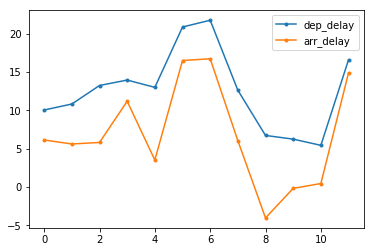

In [285]:
# Your code here
grp = flights_df.groupby(["month"], as_index=False).agg({"dep_delay":"mean","arr_delay":"mean"})
grp.plot(y = ["dep_delay","arr_delay"] ,style=".-")

* From the above figure we can see that during the months of June and July, the average arrival and departure delays increase tremendously while they fall during the months of October.

* That is to say that avg arrival delay is minimum in October while the avg departure delay is minimum in November.

### (e)

On average, how do departure delays vary over the course of a day?

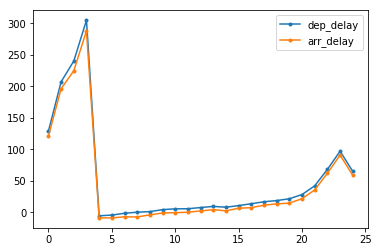

In [286]:
# Your code here
grp = flights_df.groupby(["hour"], as_index=False).agg({"dep_delay":"mean","arr_delay":"mean"})
grp.plot(y = ["dep_delay","arr_delay"] ,style=".-")

* From the above figure, we can see that during dawn (before 5 am), the average arrival and departure delays are minimum.
* The avg arrival and departure delay is maximum during the night (after 10 PM until about 1 am).

## Question 3

Which flight departing NYC in 2013 flew the fastest?

Note: compute the speed as distance/time.

In [210]:
# Your code here
flights_df["speed"] = flights_df["distance"]/flights_df["air_time"]

fastestFlight = flights_df[flights_df["speed"]==flights_df["speed"].max()]
print("The ", fastestFlight["carrier"].values[0], " flight, that flew between New York and ",
     fastestFlight["dest"].values[0], " on ", fastestFlight["month"].values[0], "/", fastestFlight["day"].values[0],
     "/2013, was the fastest in 2013.", sep="")

The DL flight, that flew between New York and ATL on 5/25/2013, was the fastest in 2013.


## Question 4

Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [279]:
# Your code here
#We find all the unique flights from NYC
#flights_df.flight.unique()
#flights_df[flights_df["flight"]==1545]

#Finding the count of the combination of a group of carrier + flight + dest
#Resetting the indext because we want to preserve the column names
#after using the size() function whose output is a list
countComb = flights_df.groupby(["carrier","flight","dest"]).size().reset_index()

#Renaming the columns
countComb.columns = ["carrier", "flight","dest", "annual frequency"]

#finding the maximum count of the combination; this must be equal to 365, i.e., the flight is daily
print("\nThe following flights fly daily from all three airports in New York:\n")
countComb[countComb["annual frequency"]==countComb["annual frequency"].max()]




The following flights fly daily from all three airports in New York:



,carrier,flight,dest,annual frequency
767,AA,59,SFO,365
775,AA,119,LAX,365
783,AA,181,LAX,365
904,AA,1357,SJU,365
914,AA,1611,MIA,365
1118,B6,219,CLT,365
1147,B6,359,BUR,365
1150,B6,371,FLL,365
1169,B6,431,SRQ,365
1243,B6,703,SJU,365


## Question 5

Develop one research question you can address using the nycflights2013
dataset. Provide two visualizations to support your exploration of
this question. Discuss what you find. 

Note: we'll using matplotlib for plotting in this course, but you can use something else too.

Using this data, I'd like to explore the answers to the following question:
* Which carrier has the worst and best performance operations from the New York airports?
* When (what seasons) is the worst performing airline the best?

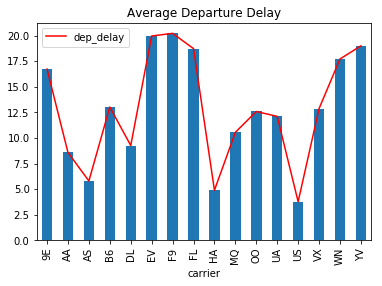

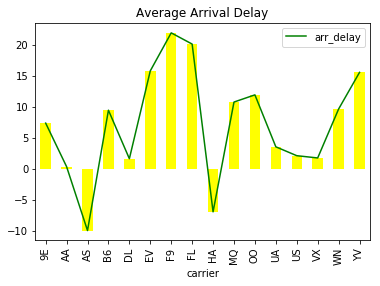

In [335]:
# Your code here
grp = flights_df.groupby(["carrier"]).agg({"dep_delay":"mean"})#.plot(kind='bar')

#making the line graph
ax = grp.plot(kind='line', color="red")

#plotting the final plot
grp.plot(kind="bar", ax=ax, legend=False, title="Average Departure Delay")

#Plot for avg arrival delays
grp = flights_df.groupby(["carrier"]).agg({"arr_delay":"mean"})#.plot(kind='bar')

#making the line graph
ax = grp.plot(kind='line', color="green")

#plotting the final plot
grp.plot(kind="bar", ax=ax, legend=False, color="yellow", title="Average Arrival Delay")

* Thus, from the above plots it is clear that F9 is the worst performing airlines given its high departure and delay times.

* HA and AS have the best operational performance.

* Also, it is worth noting that most of the flight arrive at their destination before their scheduled time or they arive within 10 minutes of their scheduled arrival time. Given the first graph, we can say that even if the flights tend to depart a little later than their scheduled arrival time, it is highly likely that the flight will not arrive later than 10 minutes of its scheduled departure time.

## Question 6

What weather conditions are associated with flight delays leaving NYC?  Use graphics to explore.

Note: you need to use 'weather.csv' dataset

In [341]:
# Your code here
#Reading the weather data
path = os.getcwd()
dataPath = path + "/data/weather.csv.bz2"
weather_df = pd.read_csv(dataPath,compression='bz2')

In [357]:
# Grouping and aggregating data in both flights and weather dataser
w = weather_df.groupby(['year','month','day','origin'], as_index=False).mean()
f = flights_df.groupby(['year','month','day','origin'], as_index=False).mean()

In [370]:
#Joining (inner) the weather data with the flights data
merge_df = pd.merge(flights_df, weather_df, on=['year','month','day','origin'], how='inner')
merge_df

,Unnamed: 0_x,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,...,hour_y,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,...,11.782609,38.4800,25.050435,58.386087,263.043478,12.758648,14.682397,0.0,1012.442857,10.0
1,6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,...,11.782609,38.4800,25.050435,58.386087,263.043478,12.758648,14.682397,0.0,1012.442857,10.0
2,7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,...,11.782609,38.4800,25.050435,58.386087,263.043478,12.758648,14.682397,0.0,1012.442857,10.0
3,14,2013,1,1,558.0,-2.0,923.0,-14.0,UA,N53441,...,11.782609,38.4800,25.050435,58.386087,263.043478,12.758648,14.682397,0.0,1012.442857,10.0
4,17,2013,1,1,559.0,-1.0,854.0,-8.0,UA,N76515,...,11.782609,38.4800,25.050435,58.386087,263.043478,12.758648,14.682397,0.0,1012.442857,10.0
5,20,2013,1,1,601.0,1.0,844.0,-6.0,B6,N644JB,...,11.782609,38.4800,25.050435,58.386087,263.043478,12.758648,14.682397,0.0,1012.442857,10.0
6,23,2013,1,1,606.0,-4.0,858.0,-12.0,AA,N633AA,...,11.782609,38.4800,25.050435,58.386087,263.043478,12.758648,14.682397,0.0,1012.442857,10.0
7,25,2013,1,1,607.0,0.0,858.0,-17.0,UA,N53442,...,11.782609,38.4800,25.050435,58.386087,263.043478,12.758648,14.682397,0.0,1012.442857,10.0
8,26,2013,1,1,608.0,8.0,807.0,32.0,MQ,N9EAMQ,...,11.782609,38.4800,25.050435,58.386087,263.043478,12.758648,14.682397,0.0,1012.442857,10.0
9,30,2013,1,1,615.0,0.0,833.0,-9.0,DL,N326NB,...,11.782609,38.4800,25.050435,58.386087,263.043478,12.758648,14.682397,0.0,1012.442857,10.0


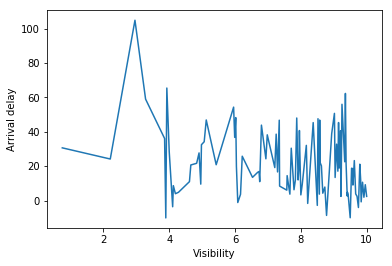

In [375]:
#Plotting visibility vs arrival delay
v=merge_df.groupby(['visib'])['arr_delay'].mean()
plt.plot(v)
plt.xlabel('Visibility')
plt.ylabel('Arrival delay')
plt.show()


* From this plot, we can infer that as expected, lower the visibility, higher is the arrival delay.

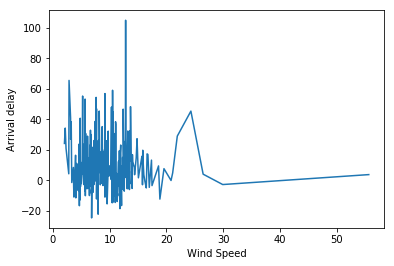

In [374]:
#Plotting wind_speed vs arrival delay
w=merge_df.groupby(['wind_speed'])['arr_delay'].mean()
plt.plot(w)
plt.xlabel('Wind Speed')
plt.ylabel('Arrival delay')
plt.show()

* From this plot, we can infer that there is no apparent relationship between wind speed and arrival delay when the speed is less than 30. With an increase in wind speed over the limit of 30, there seems to be a slight increase in the mean arrival delay.